<a href="https://colab.research.google.com/github/BenxiaHu/DeepLearning/blob/main/FullyConnectedNetwork_CRE_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cpu
Epoch 0: Train Loss = 1.0153180360794067, Test Loss = 0.9590047001838684
Epoch 10: Train Loss = 1.0010156631469727, Test Loss = 0.9518564343452454
Epoch 20: Train Loss = 1.0003420114517212, Test Loss = 0.9491809606552124
Epoch 30: Train Loss = 0.9996347427368164, Test Loss = 0.9496745467185974
Epoch 40: Train Loss = 0.9989443421363831, Test Loss = 0.9494606852531433
Epoch 50: Train Loss = 0.9981628060340881, Test Loss = 0.9495360851287842
Epoch 60: Train Loss = 0.9972317218780518, Test Loss = 0.9502068758010864
Epoch 70: Train Loss = 0.9961056709289551, Test Loss = 0.9511993527412415
Epoch 80: Train Loss = 0.9948016405105591, Test Loss = 0.9526180624961853
Epoch 90: Train Loss = 0.993209958076477, Test Loss = 0.9540914297103882
Epoch 100: Train Loss = 0.9912453889846802, Test Loss = 0.9559338092803955
Epoch 110: Train Loss = 0.9886393547058105, Test Loss = 0.9578688144683838
Epoch 120: Train Loss = 0.9853739142417908, Test Loss = 0.9588223099708557
Epoch 130: Train Lo

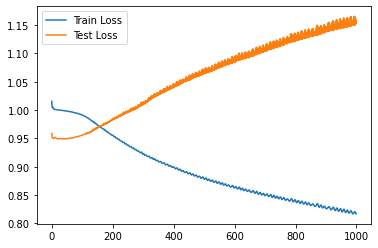

In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# Define the neural network architecture
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        # Set weight for connections from A to the first hidden layer
        self.fc1.weight.data[:, 0] = abs(self.fc1.weight.data[:, 1])
        # Set weight for connections from C to the first hidden layer
        self.fc1.weight.data[:, 3] = abs(self.fc1.weight.data[:, 3])
        # Set weight for connections from B to the first hidden layer
        self.fc1.weight.data[:, 1] = abs(self.fc1.weight.data[:, 1]) * (-1)
        # Set weight for connections from C to the first hidden layer
        self.fc1.weight.data[:, 2] = abs(self.fc1.weight.data[:, 2]) * (-1)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, A, B, C, D):
        x = torch.cat((A, B, C, D), dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


# Generate some dummy input and output data for testing
A_train = torch.randn(10000, 1)
B_train = torch.randn(10000, 1)
C_train = torch.randn(10000, 1)
D_train = torch.randn(10000, 1)
E_train = torch.randn(10000, 1)

A_test = torch.randn(1000, 1)
B_test = torch.randn(1000, 1)
C_test = torch.randn(1000, 1)
D_test = torch.randn(1000, 1)
E_test = torch.randn(1000, 1)

# Move the data and the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = MyNet().to(device)


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses = []
test_losses = []


for epoch in range(1000):
    # Train the model on the training data
    model.train()
    optimizer.zero_grad()
    outputs = model(A_train.to(device), B_train.to(device), C_train.to(device), D_train.to(device))
    train_loss = criterion(outputs, E_train.to(device))
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Evaluate the model on the test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(A_test.to(device), B_test.to(device), C_test.to(device), D_test.to(device))
        test_loss = criterion(test_outputs, E_test.to(device))
        test_losses.append(test_loss.item())

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss.item()}, Test Loss = {test_loss.item()}")

# Plot the training and test losses over time
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

